In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA340_NLP_FINAL/train.csv')

In [4]:
train_set.head()

,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...


### Data Exploration

In [5]:
len(train_set['Artist'].unique())

11152

In [6]:
len(train_set['Genre'].unique())

10

In [7]:
len(train_set['Language'].unique())

34

In [8]:
len(train_set)

290183

#### Extracting only the songs in English

In [9]:
trainSetEn = train_set.drop(train_set[train_set['Language'] != 'en'].index)

In [10]:
len(trainSetEn['Artist'].unique())

10701

In [11]:
len(trainSetEn['Genre'].unique())

10

In [12]:
trainSetEn['Genre'].unique()

array(['Rock', 'Metal', 'Pop', 'Indie', 'Folk', 'Electronic', 'R&B',
       'Jazz', 'Hip-Hop', 'Country'], dtype=object)

In [13]:
len(trainSetEn)

250197

ValueError: ignored

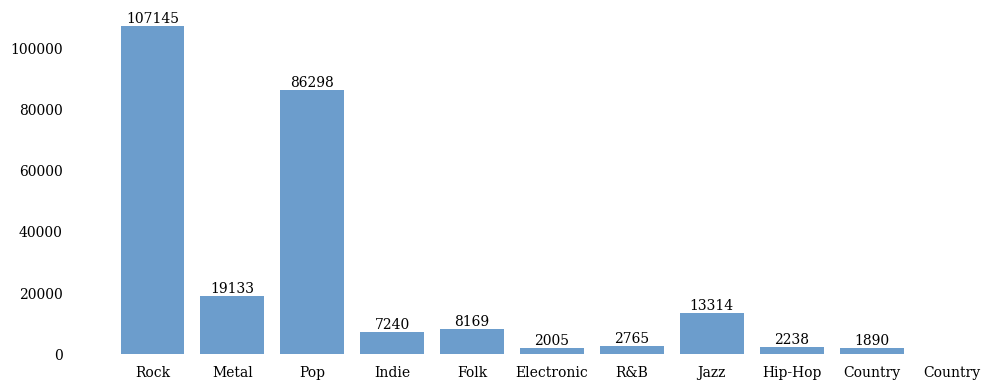

In [19]:
import matplotlib.pyplot as plt
from matplotlib import colors

plt.rcParams['font.family'] = 'Serif'

fig, axs = plt.subplots(1, 1, figsize=(10, 4), tight_layout=True)

for s in ['top', 'bottom', 'left', 'right']:
    axs.spines[s].set_visible(False)

axs.xaxis.set_ticks_position('none')
axs.yaxis.set_ticks_position('none')

axs.xaxis.set_tick_params(pad=5)
axs.yaxis.set_tick_params(pad=10)

N, bins, patches = axs.hist(trainSetEn['Genre'], bins=10, rwidth=0.8, color='#6c9dcc')  # Add rwidth to control bar width

for i, count in enumerate(N):
    x = bins[i] + (bins[i + 1] - bins[i]) / 2
    plt.text(x, count + 0.1, str(int(count)), ha='center', va='bottom')

plt.xticks(bins + (bins[1] - bins[0]) / 2, trainSetEn['Genre'].unique(), rotation=0, ha='center')

plt.xlabel("Genres")
plt.ylabel("Count of Songs")
plt.title('Number of Songs Per Genre')

plt.show()
plt.save_fig(bbox_inches = 'tight')

In [ ]:
trainSetEn['Genre'].value_counts()

Rock          107145
Pop            86298
Metal          19133
Jazz           13314
Folk            8169
Indie           7240
R&B             2765
Hip-Hop         2238
Electronic      2005
Country         1890
Name: Genre, dtype: int64

### Data Preprocessing

Some of the lyrics, like the ones shown below, have markers indicating the start of lyrical structures like verse, chorus, refrain, etc. I will strip the data of these markers, replacing anything in [words] format with no space.

In [ ]:
# before
trainSetEn['Lyrics'][290125]

"Days Days [Verse 1:] Days Stealing secret moments Breathing in the summer sun As the sea of changes Wash ashore Days In the grand wide open There's so much to catch the eye Your beauty, shade and light Shade and light [Chorus :] Quite Witness to forever In my silene I keep holding on I am waiting til forever And I understand where we belong Quite Witness to forever In my silene I keep holding on I am waiting til forever And I understand where we belong And I understand where we belong And I understand where we belong And I understand where we belong And I understand where we belong [Verse 2:] Days In the grand wide open There's so much to catch the eye Your beauty, shade and light Shade and light [Chorus :] Quite Witness to forever In my silene I keep holding on I am waiting til forever And I understand where we belong Quite Witness to forever In my silene I keep holding on I am waiting til forever And I understand where we belong Quite Witness to forever In my silene I keep holding o

In [ ]:
trainSetEn['Lyrics'] = trainSetEn['Lyrics'].str.replace(r'\[.*?\]', '', regex=True)

In [ ]:
# after
trainSetEn['Lyrics'][290125]

"Days Days  Days Stealing secret moments Breathing in the summer sun As the sea of changes Wash ashore Days In the grand wide open There's so much to catch the eye Your beauty, shade and light Shade and light  Quite Witness to forever In my silene I keep holding on I am waiting til forever And I understand where we belong Quite Witness to forever In my silene I keep holding on I am waiting til forever And I understand where we belong And I understand where we belong And I understand where we belong And I understand where we belong And I understand where we belong  Days In the grand wide open There's so much to catch the eye Your beauty, shade and light Shade and light  Quite Witness to forever In my silene I keep holding on I am waiting til forever And I understand where we belong Quite Witness to forever In my silene I keep holding on I am waiting til forever And I understand where we belong Quite Witness to forever In my silene I keep holding on I am waiting til forever And I underst

Some songs also have symbols in place of a single quote.

In [ ]:
# before
trainSetEn['Lyrics'][54524]

'describe the touch, no itâ€™s the thought\nitâ€™s warm and yellow and has a ruffle\nitâ€™s warm and yellow and...\nheâ€™s so quiet i forgot heâ€™s there\nand i think here i am.\nâ€œoh alice, come back heâ€™s just a kitten...\nheâ€™s just a kittenâ€\x9d\na thousand leaves for your disguise fall on\nthe sky and looking up from down is a sea to\nrealize the leaves are falling up and down\nup and round.\nand this is from my heart to you\na crazy wind will stir me too and contre de la\nsexisme\ni am with you.\n.'

In [ ]:
trainSetEn['Lyrics'] = trainSetEn['Lyrics'].str.replace('â€™', "'", regex=False)
trainSetEn['Lyrics'] = trainSetEn['Lyrics'].str.replace('â€œ', " ", regex=False)
trainSetEn['Lyrics'] = trainSetEn['Lyrics'].str.replace('â€', " ... ", regex=False)

In [ ]:
trainSetEn['Lyrics'][54524]

"describe the touch, no it's the thought\nit's warm and yellow and has a ruffle\nit's warm and yellow and...\nhe's so quiet i forgot he's there\nand i think here i am.\n oh alice, come back he's just a kitten...\nhe's just a kitten ... \x9d\na thousand leaves for your disguise fall on\nthe sky and looking up from down is a sea to\nrealize the leaves are falling up and down\nup and round.\nand this is from my heart to you\na crazy wind will stir me too and contre de la\nsexisme\ni am with you.\n."

Other songs have intros that aren't found in the song, rather are a product of the web scraping

In [ ]:
# before
trainSetEn['Lyrics'][101231]

"Music by Elton John\nLyrics by Bernie Taupin\nNever released\nSee my eyes and I see my arms\nThe seagulls say you've gone\nIt was just a game of let's pretend\nAnd I whistle to the waves that lend me tears\nPurple clouds, golden rain\nYesterday has gone\nAnd a dandelion dies in the wind\n\nIf you're quick enough to rise\nWith the sleep still in your eyes\nYou'll see the shadow of the sun above my mind\nI know that only you can help me now\n\nPurple clouds, golden rain\nYesterday has gone\nAnd a dandelion dies in the wind\n\nBut a dandelion sighs\nAnd it tries to tell the wind\nThat crying's not a bad thing\nWorrying is a sin\n\nIf they sent a cloud from heaven\nI would ride into the skies\nTo escape all of my troubles\nAnd to cast away your lies\n\nPurple rains have turn to gold\nThe clouds of yesterday\nAnd a dandelion dies in the wind\n\nI see my eyes and I see my arms\nThe seagulls say you've gone\nIt was just a game of let's pretend\nAnd I whistle to the waves that lend me tears\n

In [ ]:
trainSetEn['Lyrics'] = trainSetEn['Lyrics'].str.replace(r'Music by.*?\n', ' ', regex=True)
trainSetEn['Lyrics'] = trainSetEn['Lyrics'].str.replace(r'Lyrics by.*?\n', ' ', regex=True)
trainSetEn['Lyrics'] = trainSetEn['Lyrics'].str.replace(r'Song by.*?\n', ' ', regex=True)
trainSetEn['Lyrics'] = trainSetEn['Lyrics'].str.replace(r'Lyric by.*?\n', ' ', regex=True)
trainSetEn['Lyrics'] = trainSetEn['Lyrics'].str.replace(r'music by.*?\n', ' ', regex=True)
trainSetEn['Lyrics'] = trainSetEn['Lyrics'].str.replace(r'lyrics by.*?\n', ' ', regex=True)
trainSetEn['Lyrics'] = trainSetEn['Lyrics'].str.replace(r'song by.*?\n', ' ', regex=True)
trainSetEn['Lyrics'] = trainSetEn['Lyrics'].str.replace(r'lyric by.*?\n', ' ', regex=True)

In [ ]:
# after
trainSetEn['Lyrics'][101231]

"  Never released\nSee my eyes and I see my arms\nThe seagulls say you've gone\nIt was just a game of let's pretend\nAnd I whistle to the waves that lend me tears\nPurple clouds, golden rain\nYesterday has gone\nAnd a dandelion dies in the wind\n\nIf you're quick enough to rise\nWith the sleep still in your eyes\nYou'll see the shadow of the sun above my mind\nI know that only you can help me now\n\nPurple clouds, golden rain\nYesterday has gone\nAnd a dandelion dies in the wind\n\nBut a dandelion sighs\nAnd it tries to tell the wind\nThat crying's not a bad thing\nWorrying is a sin\n\nIf they sent a cloud from heaven\nI would ride into the skies\nTo escape all of my troubles\nAnd to cast away your lies\n\nPurple rains have turn to gold\nThe clouds of yesterday\nAnd a dandelion dies in the wind\n\nI see my eyes and I see my arms\nThe seagulls say you've gone\nIt was just a game of let's pretend\nAnd I whistle to the waves that lend me tears\n\nPurple clouds, golden rain\nYesterday has 

Some songs (less than 100) have links to where the song lyrics came from, or say 'by:' and whoever authored the song.

In [ ]:
#before
link_subset = trainSetEn[trainSetEn['Lyrics'].str.contains('http', case=False)]
link_subset['Lyrics'][18921]

"I look at you all\nSee the love there that's sleeping\nWhile my guitar gently weeps\nI look at the floor\nAnd I see it needs sweeping\nStill my guitar gently weeps\nI don't know why nobody told you\nHow to unfold your love\nI don't know how someone controlled you\nThey bought and sold you\nI look at the world\nAnd I notice it's turning\nWhile my guitar gently weeps\nWith every mistake\nWe must surely be learning\nStill my guitar gently weeps\nI don't know how you were diverted\nYou were perverted too\nI don't know how you were inverted\nNo one alerted you\nI look at you all\nSee the love there that's sleeping\nWhile my guitar gently weeps\nI look at you all\nStill my guitar gently weeps\nhttp://www.vagalume.com.br/the-beatles/while-my-guitar-gently-weeps.html#ixzz1vMXQeD00"

In [ ]:
trainSetEn['Lyrics'] = trainSetEn['Lyrics'].str.replace(r'http:.*', '', regex=True)
trainSetEn['Lyrics'] = trainSetEn['Lyrics'].str.replace(r'by:.*', '', regex=True)
trainSetEn['Lyrics'] = trainSetEn['Lyrics'].str.replace(r'Por:.*', '', regex=True)

In [ ]:
#after
trainSetEn['Lyrics'][18921]

"I look at you all\nSee the love there that's sleeping\nWhile my guitar gently weeps\nI look at the floor\nAnd I see it needs sweeping\nStill my guitar gently weeps\nI don't know why nobody told you\nHow to unfold your love\nI don't know how someone controlled you\nThey bought and sold you\nI look at the world\nAnd I notice it's turning\nWhile my guitar gently weeps\nWith every mistake\nWe must surely be learning\nStill my guitar gently weeps\nI don't know how you were diverted\nYou were perverted too\nI don't know how you were inverted\nNo one alerted you\nI look at you all\nSee the love there that's sleeping\nWhile my guitar gently weeps\nI look at you all\nStill my guitar gently weeps\n"

Lastly, some songs have portions of the song (usually repeated ohs or ahs) followed by (x3) or some other number to indicate repititon. Rather than replace these instances in the song with whitespace, and lose the possible genre indication from the repitition of those lines that are spelled out, I remove those songs from the corpus.

In [ ]:
repetition_subset = trainSetEn[trainSetEn['Lyrics'].str.contains(r'x\d+', case=False)]

In [ ]:
repetition_subset['Lyrics'][15]
print(len(repetition_subset))

3457


In [ ]:
trainSetEn = trainSetEn[~trainSetEn['Lyrics'].str.contains(r'x\d+', regex=True, case=False)]

In [ ]:
repetition_check = trainSetEn[trainSetEn['Lyrics'].str.contains(r'x\d+', case=False)]
len(repetition_check)

0

Other songs (about 4,000) have lyrical structure markers that are in place of the actual lyrics. I will remove these from the corpus, as the lack of actual lyrics in place of the markers means that the song could potentially be misclassified, and the point of using the lyrics is dulled.

In [ ]:
fake_lyrics_subset = trainSetEn[trainSetEn['Lyrics'].str.contains('Chorus:', case=False)]

In [ ]:
#before
fake_lyrics_subset['Lyrics'][294]

"Chorus:\nFrom chaos comes clarity, I tell ya\nWhat you appear to be, you ought to know\nGlycerin tears don't fool me, I tell ya\nDelusions plaguing everybody\nMakin that hybrid music back in '90 now it's on ya\nI hear we were the model for the band you front we spawned ya\nFinding it hard to come original we warned ya\nWe're shakin the white boys in New York, black girls in California\nWe come through hip-hop drum-n-bass and dancehall rhythms\nYou want our beats and lyrics you want to get them\nWatchin you sink into the depths of opportunism\nMissing the point, music's about love not pessimism\nI'm SA moving supreme and on my team\nI rock the mic with a sweet lean\nAnd you know that started as a fact the only DJ MC gettin down like that\nMetaphorically we are the chief of police you're rock n' roll\nAnd we're positive you stole more than just the radio\nNow it's 21 and we are back in control\nThe jammies are coming, people succumbing cuz we got the soul\nBridge:\nEveryone tends to for

In [ ]:
trainSetEn = trainSetEn[~trainSetEn['Lyrics'].str.contains('Chorus:', regex=True, case=False)]
trainSetEn = trainSetEn[~trainSetEn['Lyrics'].str.contains('Bridge:', regex=True, case=False)]
trainSetEn = trainSetEn[~trainSetEn['Lyrics'].str.contains('Verse:', regex=True, case=False)]
trainSetEn = trainSetEn[~trainSetEn['Lyrics'].str.contains('Refrain:', regex=True, case=False)]
trainSetEn = trainSetEn[~trainSetEn['Lyrics'].str.contains('Lyrics:', regex=True, case=False)]
trainSetEn = trainSetEn[~trainSetEn['Lyrics'].str.contains(r'Verse\s+\d+', regex=True, case=False)]

In [ ]:
#after
trainSetEn['Lyrics'][294] # gives a keyerror because it's gone

KeyError: ignored

Lastly, there are some songs that are duplicates. I need to remove one occurrence of all duplicate songs.

In [ ]:
duplicates_mask = trainSetEn.duplicated(subset=['Artist', 'Song'], keep=False)
duplicated_songs = trainSetEn[duplicates_mask]
duplicated_songs = duplicated_songs.sort_values(by=['Artist', 'Song'])
duplicated_songs

,Artist,Song,Genre,Language,Lyrics
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
25,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...
26,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
...,...,...,...,...,...
69718,zz top,thunderbird,Rock,en,"Get high, everybody, get high.\nGet high, ever..."
69554,zz top,tube snake boogie,Rock,en,"I got a girl she lives cross town,\nShe's the ..."
69722,zz top,tube snake boogie,Rock,en,"I got a girl she lives cross town,\nShe's the ..."
69542,zz top,tush,Rock,en,"Yeah\nI been up, I been down.\nTake my word, m..."


In [ ]:
trainSetEn = trainSetEn.groupby(['Artist', 'Song'], as_index=False).apply(lambda group: group.sample(1)).reset_index(drop=True)

In [ ]:
duplicates_mask = trainSetEn.duplicated(subset=['Artist', 'Song'], keep=False)
duplicated_songs = trainSetEn[duplicates_mask]
len(duplicated_songs)

0

In [ ]:
trainSetCleaned = trainSetEn
trainSetCleaned.to_csv('/content/drive/MyDrive/Colab Notebooks/DATA340_NLP_FINAL/train_full_cleaned_data.csv')

Now, we are left with the following statistics for number of song per genre:

In [ ]:
print(len(trainSetEn['Genre']))
trainSetCleaned['Genre'].value_counts()

203674


Rock          88085
Pop           64643
Metal         15995
Jazz          13004
Folk           7370
Indie          6556
R&B            2587
Hip-Hop        1888
Electronic     1824
Country        1722
Name: Genre, dtype: int64

#### Seperating by Genre

I will be choosing 1500 random songs from each category so that each genre has the same number of songs in the test set.

Reasons why:
- since Rock has an enormous number of songs, the model might learn to choose Rock when it is unsure of the genre
- I need to decrease the size of the set anyways because of computational complexity
- I can compare accuracy and precision better if all of the songs appear in the dataset an equal number of times
- with an 80/20 train test split, there will be 1200 training and 300 testing per genre. the cleaned test set will have a greater number to be evaluated on

First, I must seperate all of the genres into their own dataframes.

In [ ]:
trainSetRock = trainSetCleaned.drop(trainSetCleaned[trainSetCleaned['Genre'] != 'Rock'].index)
print(len(trainSetRock))
trainSetRock.head(1)

88085


,Artist,Song,Genre,Language,Lyrics
1,10 cc,lazy days,Rock,en,Hazy Days With Lazy Ways You get less done but...


In [ ]:
trainSetPop = trainSetCleaned.drop(trainSetCleaned[trainSetCleaned['Genre'] != 'Pop'].index)
print(len(trainSetPop))
trainSetPop.head(1)

64643


,Artist,Song,Genre,Language,Lyrics
104,1910 fruitgum company,simon says,Pop,en,"I'd like to play a game, That is so much fun, ..."


In [ ]:
trainSetMetal = trainSetCleaned.drop(trainSetCleaned[trainSetCleaned['Genre'] != 'Metal'].index)
print(len(trainSetMetal))
trainSetMetal.head(1)

15995


,Artist,Song,Genre,Language,Lyrics
25,11th hour,mountain moving faith,Metal,en,There was a man in the bible named peter A dis...


In [ ]:
trainSetJazz = trainSetCleaned.drop(trainSetCleaned[trainSetCleaned['Genre'] != 'Jazz'].index)
print(len(trainSetJazz))
trainSetJazz.head(1)

13004


,Artist,Song,Genre,Language,Lyrics
1516,aaron neville,ain t no sunshine,Jazz,en,Ain't no sunshine when she's gone Only darknes...


In [ ]:
trainSetFolk = trainSetCleaned.drop(trainSetCleaned[trainSetCleaned['Genre'] != 'Folk'].index)
print(len(trainSetFolk))
trainSetFolk.head(1)

7370


,Artist,Song,Genre,Language,Lyrics
1513,aaron nazrul,butterfly man,Folk,en,"Layin up in bed, all night with you again Yeah..."


In [ ]:
trainSetIndie = trainSetCleaned.drop(trainSetCleaned[trainSetCleaned['Genre'] != 'Indie'].index)
print(len(trainSetIndie))
trainSetIndie.head(1)

6556


,Artist,Song,Genre,Language,Lyrics
1073,6 day riot,sky father,Indie,en,I left this earth today Didn't look back at my...


In [ ]:
trainSetRB = trainSetCleaned.drop(trainSetCleaned[trainSetCleaned['Genre'] != 'R&B'].index)
print(len(trainSetRB))
trainSetRB.head(1)

2587


,Artist,Song,Genre,Language,Lyrics
106,1984,body torsion,R&B,en,Like the tree that bends under the wind i stan...


In [ ]:
trainSetHipHop = trainSetCleaned.drop(trainSetCleaned[trainSetCleaned['Genre'] != 'Hip-Hop'].index)
print(len(trainSetHipHop))
trainSetHipHop.head(1)

1888


,Artist,Song,Genre,Language,Lyrics
16,112,all my love,Hip-Hop,en,When I look into your eyes I see you're lonely...


In [ ]:
trainSetElectronic = trainSetCleaned.drop(trainSetCleaned[trainSetCleaned['Genre'] != 'Electronic'].index)
print(len(trainSetElectronic))
trainSetElectronic.head(1)

1824


,Artist,Song,Genre,Language,Lyrics
0,1 800 zombie,unicorn,Electronic,en,"Don't call me horse. I'm a unicorn. Mystical, ..."


In [ ]:
trainSetCountry = trainSetCleaned.drop(trainSetCleaned[trainSetCleaned['Genre'] != 'Country'].index)
print(len(trainSetCountry))
trainSetCountry.head(1)

1722


,Artist,Song,Genre,Language,Lyrics
400,3 of hearts,arizona rain,Country,en,My heart is like a desert Gone too long withou...


Next, I need to randomly select 1500 songs from each genre.

In [ ]:
trainSetRock = trainSetRock.sample(n = 1500, random_state = 24)

In [ ]:
trainSetRock.head()

,Artist,Song,Genre,Language,Lyrics
78168,franz ferdinand,swallow smile,Rock,en,I rise and curse the waking day\nCurse the gri...
155890,ry cooder,big bad bill is sweet william now,Rock,en,In the town of Louisville they got a man they ...
52293,daryl hall,let me be the one,Rock,en,We've been through love time & time again\nTri...
130715,"mullins, shawn",we run,Rock,en,in the town that i was born in\nthere rides a ...
169162,stray cats,reckless,Rock,en,Well I met you in the backroom\nYou had lipsti...


In [ ]:
len(trainSetRock)

1500

In [ ]:
#pop
trainSetPop = trainSetPop.sample(n = 1500, random_state = 24)
print(len(trainSetPop))

#metal
trainSetMetal = trainSetMetal.sample(n = 1500, random_state = 24)
print(len(trainSetMetal))

#jazz
trainSetJazz = trainSetJazz.sample(n = 1500, random_state = 24)
print(len(trainSetJazz))

#folk
trainSetFolk = trainSetFolk.sample(n = 1500, random_state = 24)
print(len(trainSetFolk))

#indie
trainSetIndie = trainSetIndie.sample(n = 1500, random_state = 24)
print(len(trainSetIndie))

#R&B
trainSetRB = trainSetRB.sample(n = 1500, random_state = 24)
print(len(trainSetRB))

#hip-hop
trainSetHipHop = trainSetHipHop.sample(n = 1500, random_state = 24)
print(len(trainSetHipHop))

#electronic
trainSetElectronic = trainSetElectronic.sample(n = 1500, random_state = 24)
print(len(trainSetElectronic))

#country
trainSetCountry = trainSetCountry.sample(n = 1500, random_state = 24)
print(len(trainSetCountry))

1500
1500
1500
1500
1500
1500
1500
1500
1500


Lastly, I need to merge all these dataframes into a new one that has all of the information and export this dataframe as a csv.

In [ ]:
trainGenreSubset = pd.concat([trainSetRock,trainSetPop,trainSetMetal,trainSetJazz,trainSetIndie,trainSetHipHop,trainSetFolk,trainSetCountry,trainSetElectronic,trainSetRB], axis = 0)

In [ ]:
trainGenreSubset.reset_index()

,index,Artist,Song,Genre,Language,Lyrics
0,78168,franz ferdinand,swallow smile,Rock,en,I rise and curse the waking day\nCurse the gri...
1,155890,ry cooder,big bad bill is sweet william now,Rock,en,In the town of Louisville they got a man they ...
2,52293,daryl hall,let me be the one,Rock,en,We've been through love time & time again\nTri...
3,130715,"mullins, shawn",we run,Rock,en,in the town that i was born in\nthere rides a ...
4,169162,stray cats,reckless,Rock,en,Well I met you in the backroom\nYou had lipsti...
...,...,...,...,...,...,...
14995,102055,jonathan mcreynolds,l.r.f. (move that over),R&B,en,my friends\nmy family\nmy relationships\nwhate...
14996,40227,calibretto 13,soul stalker,R&B,en,Darkness bathes the city face. It's something ...
14997,155313,ruben studdard,to da crib,R&B,en,"Let's go, let's go, KL\nLet's go, let's go\nLe..."
14998,117950,luther vandross,i know,R&B,en,I know that you've been good to me\nAnd I know...


In [ ]:
trainGenreSubset.to_csv('/content/drive/MyDrive/Colab Notebooks/DATA340_NLP_FINAL/train_genre_subset.csv')

### Now, repeat all of these steps for the testing/validation data

In [ ]:
test_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA340_NLP_FINAL/test.csv')

In [ ]:
test_set.head()

,Song,Song year,Artist,Genre,Lyrics,Track_id
0,craftsmanship,2005,buck-65,Hip-Hop,Most folks spend their days daydreaming of fin...,8294
1,come-on-out,2012,the-elwins,Indie,Take your cold hands and put them on my face\n...,21621
2,riot,2013,bullet-for-my-valentine,Metal,Are you ready it's time for war\nWe'll break d...,3301
3,that-s-what-girls-do,2007,dream-street,Pop,You ask me why I change the color of my hair\n...,2773
4,believe-in-a-dollar,2012,cassidy,Hip-Hop,Do you believe in magic in a young girl's hear...,16797


In [ ]:
test_set = test_set.drop(test_set.columns[1], axis=1)
test_set = test_set.drop(test_set.columns[4], axis=1)

In [ ]:
test_set.head(1)

,Song,Artist,Genre,Lyrics
0,craftsmanship,buck-65,Hip-Hop,Most folks spend their days daydreaming of fin...


In [ ]:
test_set['Genre'].value_counts()

Rock          1410
Pop           1110
Hip-Hop        960
Metal          810
Country        810
Jazz           660
Electronic     660
Indie          510
R&B            510
Folk           495
Name: Genre, dtype: int64

#### Cleaning the Data

In [ ]:
test_set['Lyrics'] = test_set['Lyrics'].str.replace(r'\[.*?\]', '', regex=True)

In [ ]:
test_set['Lyrics'] = test_set['Lyrics'].str.replace('â€™', "'", regex=False)
test_set['Lyrics'] = test_set['Lyrics'].str.replace('â€œ', " ", regex=False)
test_set['Lyrics'] = test_set['Lyrics'].str.replace('â€', " ... ", regex=False)

test_set['Lyrics'] = test_set['Lyrics'].str.replace(r'Music by.*?\n', ' ', regex=True)
test_set['Lyrics'] = test_set['Lyrics'].str.replace(r'Lyrics by.*?\n', ' ', regex=True)
test_set['Lyrics'] = test_set['Lyrics'].str.replace(r'Song by.*?\n', ' ', regex=True)
test_set['Lyrics'] = test_set['Lyrics'].str.replace(r'Lyric by.*?\n', ' ', regex=True)
test_set['Lyrics'] = test_set['Lyrics'].str.replace(r'music by.*?\n', ' ', regex=True)
test_set['Lyrics'] = test_set['Lyrics'].str.replace(r'lyrics by.*?\n', ' ', regex=True)
test_set['Lyrics'] = test_set['Lyrics'].str.replace(r'song by.*?\n', ' ', regex=True)
test_set['Lyrics'] = test_set['Lyrics'].str.replace(r'lyric by.*?\n', ' ', regex=True)

test_set['Lyrics'] = test_set['Lyrics'].str.replace(r'http:.*', '', regex=True)
test_set['Lyrics'] = test_set['Lyrics'].str.replace(r'by:.*', '', regex=True)
test_set['Lyrics'] = test_set['Lyrics'].str.replace(r'Por:.*', '', regex=True)

test_set = test_set[~test_set['Lyrics'].str.contains(r'x\d+', regex=True, case=False)]

test_set = test_set[~test_set['Lyrics'].str.contains('Chorus:', regex=True, case=False)]
test_set = test_set[~test_set['Lyrics'].str.contains('Bridge:', regex=True, case=False)]
test_set = test_set[~test_set['Lyrics'].str.contains('Verse:', regex=True, case=False)]
test_set = test_set[~test_set['Lyrics'].str.contains('Refrain:', regex=True, case=False)]
test_set = test_set[~test_set['Lyrics'].str.contains('Lyrics:', regex=True, case=False)]
test_set = test_set[~test_set['Lyrics'].str.contains(r'Verse\s+\d+', regex=True, case=False)]

test_set = test_set.groupby(['Artist', 'Song'], as_index=False).apply(lambda group: group.sample(1)).reset_index(drop=True)


<ipython-input-245-21c077337177>:27: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test_set = test_set.groupby(['Artist', 'Song'], as_index=False).apply(lambda group: group.sample(1)).reset_index(drop=True)


In [ ]:
test_set['Genre'].value_counts()

Rock          1374
Pop           1054
Hip-Hop        856
Country        790
Metal          788
Jazz           652
Electronic     628
Indie          497
R&B            495
Folk           468
Name: Genre, dtype: int64

In [ ]:
test_set.to_csv('/content/drive/MyDrive/Colab Notebooks/DATA340_NLP_FINAL/test_full_cleaned_data.csv')

I will choose 400 randomly from each genre. In the testing set, the disparity is not as large.

First, I will seperate each genre into it's own dataframe.

In [ ]:
testSetRock = test_set.drop(test_set[test_set['Genre'] != 'Rock'].index)
print(len(testSetRock))
testSetRock.head(2)

1374


,Song,Artist,Genre,Lyrics
18,thursday,fatima-mansions,Rock,The windows watch me wait for you\nMirror mirr...
21,goodnight-saigon,billy-joel,Rock,We met as soulmates\nOn Parris Inland\nWe left...


In [ ]:
testSetPop = test_set.drop(test_set[test_set['Genre'] != 'Pop'].index)
print(len(testSetPop))
testSetPop.head(2)

1054


,Song,Artist,Genre,Lyrics
3,that-s-what-girls-do,dream-street,Pop,You ask me why I change the color of my hair\n...
9,blue-sky-blue,flower,Pop,"Gee, how I miss\nYour tender kiss,\nAnd the wo..."


In [ ]:
testSetHipHop = test_set.drop(test_set[test_set['Genre'] != 'Hip-Hop'].index)
print(len(testSetHipHop))
testSetHipHop.head(2)

856


,Song,Artist,Genre,Lyrics
0,craftsmanship,buck-65,Hip-Hop,Most folks spend their days daydreaming of fin...
4,believe-in-a-dollar,cassidy,Hip-Hop,Do you believe in magic in a young girl's hear...


In [ ]:
testSetMetal = test_set.drop(test_set[test_set['Genre'] != 'Metal'].index)
print(len(testSetMetal))
testSetMetal.head(2)

788


,Song,Artist,Genre,Lyrics
2,riot,bullet-for-my-valentine,Metal,Are you ready it's time for war\nWe'll break d...
10,the-other-side,carnal-forge,Metal,Broken hopes in a world of lies\nIt makes me b...


In [ ]:
testSetCountry = test_set.drop(test_set[test_set['Genre'] != 'Country'].index)
print(len(testSetCountry))
testSetCountry.head(2)

790


,Song,Artist,Genre,Lyrics
5,mama-bake-a-pie-daddy-kill-a-chicken,bobby-bare,Country,People starin' at me as they wheel me down the...
6,thinking-about-you,bill-monroe,Country,Now as I sigh the hours away\nI think of love ...


In [ ]:
testSetJazz = test_set.drop(test_set[test_set['Genre'] != 'Jazz'].index)
print(len(testSetJazz))
testSetJazz.head(2)

652


,Song,Artist,Genre,Lyrics
15,moments-like-this,dean-martin,Jazz,Moments like this thrill me through and throug...
46,i-m-an-indian,doris-day,Jazz,Like the Seminole\nNavajo\nKickapoo\nlike thos...


In [ ]:
testSetElectronic = test_set.drop(test_set[test_set['Genre'] != 'Electronic'].index)
print(len(testSetElectronic))
testSetElectronic.head(2)

628


,Song,Artist,Genre,Lyrics
30,kiss-my-eyes,bob-sinclar,Electronic,Over\nCome over\nOver\nCome over\nIn the dark ...
32,off-the-hook,css,Electronic,Why is that we stand so still? (still)\nPeople...


In [ ]:
testSetIndie = test_set.drop(test_set[test_set['Genre'] != 'Indie'].index)
print(len(testSetIndie))
testSetIndie.head(2)

497


,Song,Artist,Genre,Lyrics
1,come-on-out,the-elwins,Indie,Take your cold hands and put them on my face\n...
8,floods-fires,craig-cardiff,Indie,All the things we lost in the fire\nAll the th...


In [ ]:
testSetRB = test_set.drop(test_set[test_set['Genre'] != 'R&B'].index)
print(len(testSetRB))
testSetRB.head(2)

495


,Song,Artist,Genre,Lyrics
39,baby-what-you-want-me-to-do,etta-james,R&B,"You got me runnin', you got me hidin'\nYou got..."
41,cat-s-clause,germs,R&B,Down to the feline den I crawl\nto join the fe...


In [ ]:
testSetFolk = test_set.drop(test_set[test_set['Genre'] != 'Folk'].index)
print(len(testSetFolk))
testSetFolk.head(2)

468


,Song,Artist,Genre,Lyrics
35,chi-la-gagliarda,cyrilika-slavic-chamber-choir,Folk,Chi La Gagliarda\nChi la gagliarda donna vo im...
45,windows-are-rolled-down,amos-lee,Folk,"Look up, child\nThe world is born\nShoe's unti..."


In [ ]:
#rock
testSetRock = testSetRock.sample(n = 400, random_state = 24)
print(len(testSetRock))

#pop
testSetPop = testSetPop.sample(n = 400, random_state = 24)
print(len(testSetPop))

#metal
testSetMetal = testSetMetal.sample(n = 400, random_state = 24)
print(len(testSetMetal))

#jazz
testSetJazz = testSetJazz.sample(n = 400, random_state = 24)
print(len(testSetJazz))

#country
testSetCountry = testSetCountry.sample(n = 400, random_state = 24)
print(len(testSetCountry))

#indie
testSetIndie = testSetIndie.sample(n = 400, random_state = 24)
print(len(testSetIndie))

#R&B
testSetRB = testSetRB.sample(n = 400, random_state = 24)
print(len(testSetRB))

#hip-hop
testSetHipHop = testSetHipHop.sample(n = 400, random_state = 24)
print(len(testSetHipHop))

#electronic
testSetElectronic = testSetElectronic.sample(n = 400, random_state = 24)
print(len(testSetElectronic))

#folk
testSetFolk = testSetFolk.sample(n = 400, random_state = 24)
print(len(testSetFolk))

400
400
400
400
400
400
400
400
400
400


In [ ]:
testGenreSubset = pd.concat([testSetRock,testSetPop,testSetMetal,testSetJazz,testSetIndie,testSetHipHop,testSetFolk,testSetCountry,testSetElectronic,testSetRB], axis = 0)

In [ ]:
testGenreSubset

,Song,Artist,Genre,Lyrics
2586,cut-in-half-blues-version-2,beck,Rock,Some folks get their kicks steppin on ants\nso...
3498,reason-to-believe,ari-hest,Rock,The crumbling walls\nAre gonna cave in tonight...
93,one-two-three-1-2-3,al-stewart,Rock,"One, two, three\nThat's how elementary it's go..."
6789,noel,chris-tomlin,Rock,"Love incarnate, love divine\nStar and angels g..."
4957,one-step-from-paradise,danger-danger,Rock,We live like strangers playing for time\nBoth ...
...,...,...,...,...
4748,magic-road,al-green,R&B,On this magic road I'm about to lose control\n...
3390,real-love,al-green,R&B,Let me tell you what I told you\nLong before I...
483,gloomy-sunday,the-associates,R&B,Sunday is gloomy\nMy hours are slumberless\nDe...
1575,sandyface,aquabats,R&B,Whos goin for distance\nI loved a girl named S...


In [ ]:
testGenreSubset.to_csv('/content/drive/MyDrive/Colab Notebooks/DATA340_NLP_FINAL/test_genre_subset.csv')